# Advanced MLP
- Advanced techniques for training neural networks
    - Weight Initialization
    - Nonlinearity (Activation function)
    - Optimizers
    - Batch Normalization
    - Dropout (Regularization)
    - Model Ensemble

In [1]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

## Load Dataset
- MNIST dataset
- source: http://yann.lecun.com/exdb/mnist/

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


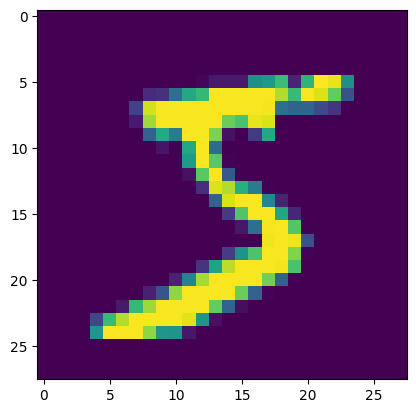

Label:  5


In [3]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])

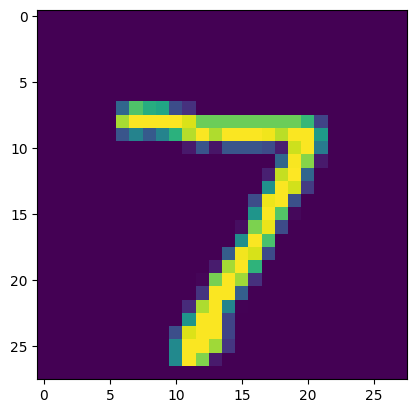

Label:  7


In [4]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

In [5]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [6]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


## Basic MLP model
- Naive MLP model without any alterations

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers
from tensorflow.keras import

In [9]:
model = Sequential()

In [12]:
model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
sgd = optimizers.SGD(learning_rate = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1015 - loss: 2.4783 - val_accuracy: 0.1075 - val_loss: 2.4270
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1025 - loss: 2.4130 - val_accuracy: 0.1075 - val_loss: 2.3868
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1060 - loss: 2.3767 - val_accuracy: 0.1075 - val_loss: 2.3597
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1016 - loss: 2.3539 - val_accuracy: 0.1075 - val_loss: 2.3412
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1029 - loss: 2.3362 - val_accuracy: 0.1075 - val_loss: 2.3285
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1043 - loss: 2.3232 - val_accuracy: 0.1075 - val_loss: 2.3199
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1035 - loss: 2.3167 - val_accuracy: 0.1075 - val_loss: 2.3140
Epoch 8/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1019 - loss: 2.3121 - val_acc

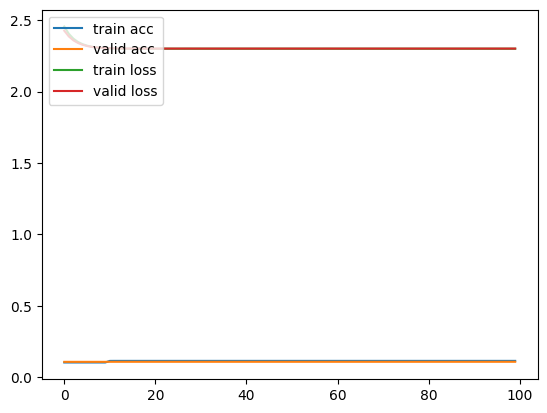

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc = 'upper left')
plt.show()

Training and validation accuracy seems to improve after around 60 epochs

In [16]:
results = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1160 - loss: 2.3009


In [17]:
print('Test accuracy: ', results[1])

Test accuracy:  0.11349999904632568


## 1. Weight Initialization
- Changing weight initialization scheme can sometimes improve training of the model by preventing vanishing gradient problem up to some degree
- He normal or Xavier normal initialization schemes are SOTA at the moment
- Doc: https://keras.io/initializers/

The He Normal initialization scheme is designed for neural networks that use the Rectified Linear Unit (ReLU) activation function. This initialization scheme sets the standard deviation of the Gaussian distribution used for weight initialization to be:
$$σ = sqrt(\frac{2} {n_{in}})$$

where $n_{in}$ is the number of input neurons to a layer. This scheme is designed to ensure that the variance of the output of each layer is roughly the same as the variance of the input, similar to the Xavier Normal initialization scheme. However, the He Normal scheme takes into account the fact that the ReLU activation function effectively halves the variance of the output of each layer, compared to the input. By doubling the standard deviation of the initialization distribution, the He Normal scheme ensures that the variance of the output of each layer remains roughly constant throughout the network.


In [20]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()

    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))

    sgd = optimizers.SGD(learning_rate = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model


In [21]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.0816 - loss: 2.3641 - val_accuracy: 0.1079 - val_loss: 2.3034
Epoch 2/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1172 - loss: 2.3001 - val_accuracy: 0.1079 - val_loss: 2.2987
Epoch 3/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1125 - loss: 2.2971 - val_accuracy: 0.1079 - val_loss: 2.2963
Epoch 4/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.1165 - loss: 2.2942 - val_accuracy: 0.1079 - val_loss: 2.2938
Epoch 5/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1167 - loss: 2.2917 - val_accuracy: 0.1079 - val_loss: 2.2913
Epoch 6/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1144 - loss: 2.2898 - val_accuracy: 0.1080 - val_loss: 2.2885
Epoch 7/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1146 - loss: 2.2869 - val_accuracy: 0.1079 - val_loss: 2.2857
Epoch 8/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1143 - loss: 2

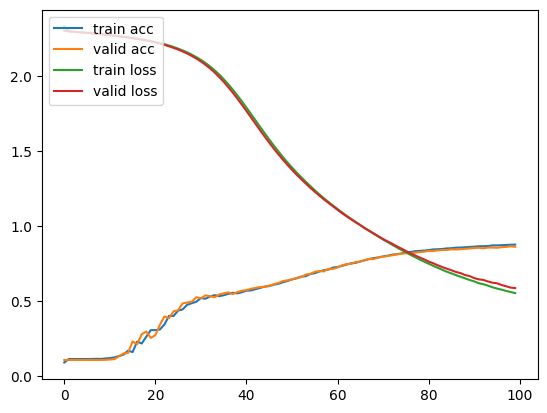

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc = 'upper left')
plt.show()

Training and validation accuracy seems to improve after around 60 epochs

In [23]:
results = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8468 - loss: 0.6289


In [24]:
print('Test accuracy: ', results[1])

Test accuracy:  0.8657000064849854


## 2. Nonlinearity (Activation function)
- Sigmoid functions suffer from gradient vanishing problem, making training slower
- There are many choices apart from sigmoid and tanh; try many of them!
    - **'relu'** (rectified linear unit) is one of the most popular ones
    - **'selu'** (scaled exponential linear unit) is one of the most recent ones
- Doc: https://keras.io/activations/

<img src="http://cs231n.github.io/assets/nn1/sigmoid.jpeg" style="width: 300px"/>
<center> $$Sigmoid~Activation~Function$$ </center>

$$Sigmoid = \sigma(z) = \frac{1}{1 + e^{(-z)}}$$

Here, $z$ is the weighted sum of the inputs and biases of a neuron in a neural network layer.

The sigmoid function maps any input value $z$ to a value between 0 and 1. When $z$ is very negative, the output of the sigmoid function is close to 0, and when $z$ is very positive, the output is close to 1. The sigmoid function is commonly used as an activation function in the output layer of binary classification problems, where the goal is to predict a binary output variable (0 or 1).
- This is the sigmoid function. At z = 0, a is equal to 0.5 and when z is a very large positive number, a is close to 1, and when z is a very large negative number, a is close to zero.
- However, the sigmoid function has a tendency to saturate for large input values, leading to the vanishing gradient problem.

<img src="http://cs231n.github.io/assets/nn1/relu.jpeg" style="width: 300px"/>
<center> $$Relu~Activation~Function$$ </center>

$$f(x) = max(0, z)$$

As you can see from the graph, the output of the ReLU function is 0 for any negative input value x, and the function increases linearly with a slope of 1 for any positive input value x. The ReLU function is a popular activation function for deep neural networks due to its simplicity and effectiveness in overcoming the vanishing gradient problem.

In [27]:
def mlp_model():
    model = Sequential()

    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(10))
    model.add(Activation('softmax'))

    sgd = optimizers.SGD(learning_rate = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [28]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5998 - loss: 2.5918 - val_accuracy: 0.8379 - val_loss: 0.5539
Epoch 2/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8624 - loss: 0.4544 - val_accuracy: 0.8913 - val_loss: 0.3811
Epoch 3/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9020 - loss: 0.3262 - val_accuracy: 0.9043 - val_loss: 0.3317
Epoch 4/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9222 - loss: 0.2690 - val_accuracy: 0.9094 - val_loss: 0.3176
Epoch 5/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9279 - loss: 0.2441 - val_accuracy: 0.9192 - val_loss: 0.2858
Epoch 6/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9377 - loss: 0.2075 - val_accuracy: 0.9224 - val_loss: 0.2711
Epoch 7/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9400 - loss: 0.1954 - val_accuracy: 0.9256 - val_loss: 0.2645
Epoch 8/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9466 - loss: 0

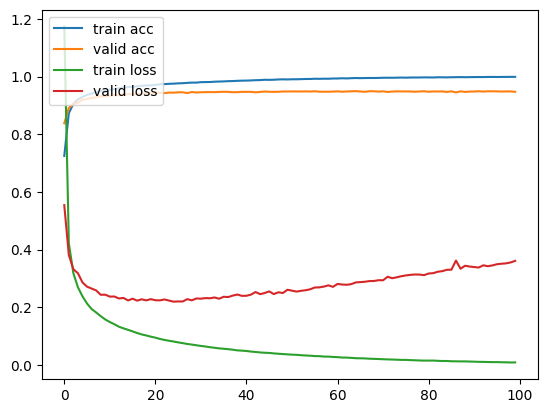

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc = 'upper left')
plt.show()

Training and validation accuracy improve instantaneously, but reach a plateau after around 30 epochs

In [30]:
results = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9413 - loss: 0.4032


In [31]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9498999714851379


## 2. Weight Initialization with relu activations
- Changing weight initialization scheme can sometimes improve training of the model by preventing vanishing gradient problem up to some degree
- He normal or Xavier normal initialization schemes are SOTA at the moment
- Doc: https://keras.io/initializers/

In [32]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()

    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('relu'))
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))

    sgd = optimizers.SGD(learning_rate = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [33]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4480 - loss: 6.4445 - val_accuracy: 0.7501 - val_loss: 0.8179
Epoch 2/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7856 - loss: 0.7316 - val_accuracy: 0.8463 - val_loss: 0.5548
Epoch 3/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8543 - loss: 0.5215 - val_accuracy: 0.8719 - val_loss: 0.4614
Epoch 4/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8806 - loss: 0.4345 - val_accuracy: 0.8860 - val_loss: 0.4166
Epoch 5/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8912 - loss: 0.3910 - val_accuracy: 0.8945 - val_loss: 0.3990
Epoch 6/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9027 - loss: 0.3479 - val_accuracy: 0.9026 - val_loss: 0.3678
Epoch 7/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9078 - loss: 0.3301 - val_accuracy: 0.9066 - val_loss: 0.3540
Epoch 8/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9157 - loss: 0

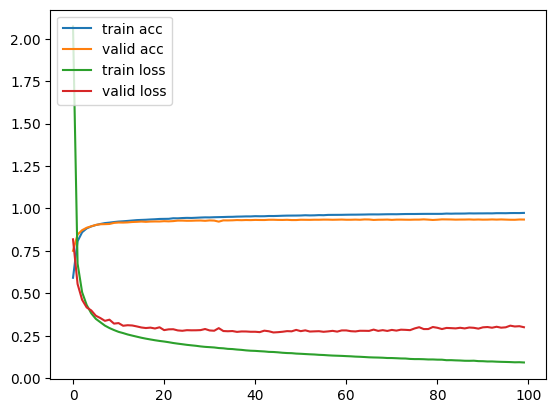

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc = 'upper left')
plt.show()

In [35]:
results = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9287 - loss: 0.3310


In [36]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9381999969482422


## 3. Optimizers
- Many variants of SGD are proposed and employed nowadays
- One of the most popular ones are Adam (Adaptive Moment Estimation)
- Doc: https://keras.io/optimizers/

<img src="http://cs231n.github.io/assets/nn3/opt2.gif" style="width: 400px"/>
<br><center> **Relative convergence speed of different optimizers** </center></br>

In [37]:
def mlp_model():
    model = Sequential()

    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    adam = optimizers.Adam(learning_rate = 0.001)                     # use Adam optimizer
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [39]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

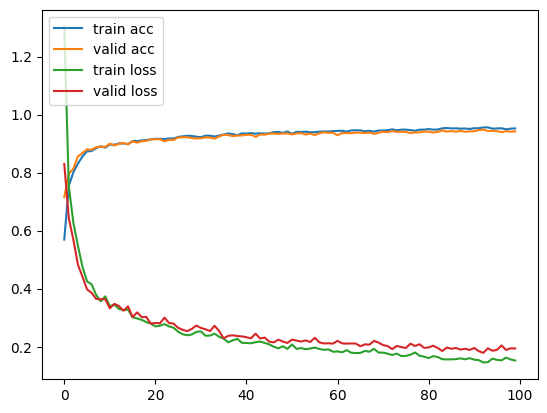

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc = 'upper left')
plt.show()

Training and validation accuracy improve instantaneously, but reach plateau after around 50 epochs

In [41]:
results = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9391 - loss: 0.2141


In [42]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9458000063896179


## 4. Batch Normalization
- Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective
- Normalize each mini-batch before nonlinearity
- Doc: https://keras.io/optimizers/

<img src="https://raw.githubusercontent.com/torch/torch.github.io/master/blog/_posts/images/resnets_modelvariants.png" style="width: 500px"/>

<br> Batch normalization layer is usually inserted after dense/convolution and before nonlinearity

Given a batch of input activations $X = [x_1, x_2, ..., x_n]$, with shape $(n, d)$, where $n$ is the batch size and $d$ is the number of features, batch normalization computes the following:

Compute the mean and variance of the batch:
$$mean=\frac{1}{n} \sum_{i=i}^{n} x_{i}$$

$$variance= \frac{1}{n} \sum_{i=i}^{n} x_{i}(x_{i}-mean)^2$$

Normalize the activations by subtracting the mean and dividing by the standard deviation:
$$x_{normalized}= \frac{x- mean}{\sqrt{varaince+\epsilon}}$$
where $\epsilon$ is a small constant added for numerical stability.

Scale and shift the normalized activations using learnable parameters $\gamma$ and $\beta$:

$$y = \gamma x_{normalized}+\beta$$

In [43]:
from keras.layers import BatchNormalization

In [44]:
def mlp_model():
    model = Sequential()

    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    sgd = optimizers.SGD(learning_rate = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [45]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

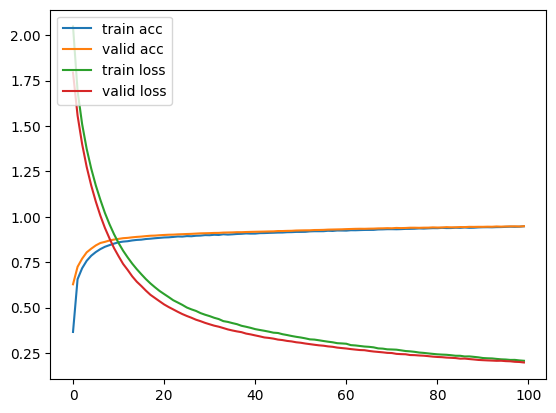

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc = 'upper left')
plt.show()

Training and validation accuracy improve consistently, but reach plateau after around 60 epochs

In [47]:
results = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9383 - loss: 0.2197


In [48]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9472000002861023


## 5. Dropout (Regularization)
- Dropout is one of powerful ways to prevent overfitting
- The idea is simple. It is disconnecting some (randomly selected) neurons in each layer
- The probability of each neuron to be disconnected, namely 'Dropout rate', has to be designated
- Doc: https://keras.io/layers/core/#dropout

<img src="https://image.slidesharecdn.com/lecture29-convolutionalneuralnetworks-visionspring2015-150504114140-conversion-gate02/95/lecture-29-convolutional-neural-networks-computer-vision-spring2015-62-638.jpg?cb=1430740006" style="width: 800px"/>

In [49]:
from keras.layers import Dropout

In [50]:
def mlp_model():
    model = Sequential()

    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))                         # Dropout layer after Activation
    model.add(Dense(10))
    model.add(Activation('softmax'))

    sgd = optimizers.SGD(learning_rate = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [51]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

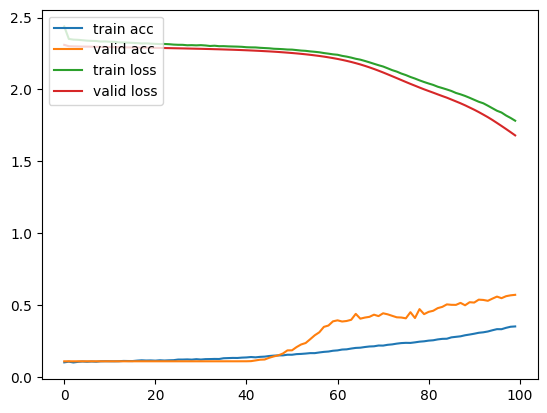

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc = 'upper left')
plt.show()

Validation results does not improve since it did not show signs of overfitting, yet.
<br> Hence, the key takeaway message is that apply dropout when you see a signal of overfitting.

In [53]:
results = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5519 - loss: 1.6698


In [54]:
print('Test accuracy: ', results[1])

Test accuracy:  0.5645999908447266


## 6. Model Ensemble
- Model ensemble is a reliable and promising way to boost performance of the model
- Usually create 8 to 10 independent networks and merge their results
- Here, we resort to scikit-learn API, **VotingClassifier**
- Doc: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html


**VotingClassifier**

A voting classifier is a type of model ensemble in machine learning that combines the predictions of multiple individual classifiers to make a final prediction. It works by aggregating the predictions of each individual classifier and selecting the class that receives the most votes.

**Soft Voting**

This involves calculating the average or weighted average of the predicted probabilities of each individual classifier for each class and selecting the class with the highest average probability as the final prediction.

![localImage](https://github.com/Ihsan149/IE803_Spring_2025/blob/main/deep_learning_with_Keras/1.%20MLP/2-Advanced-MLP/soft_voting.PNG?raw=1)


**Hard Voting**

This involves counting the votes of each individual classifier and selecting the class with the most votes as the final prediction.

![localImage](https://github.com/Ihsan149/IE803_Spring_2025/blob/main/deep_learning_with_Keras/1.%20MLP/2-Advanced-MLP/hard_voting.PNG?raw=1)


In [61]:
import numpy as np
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

ModuleNotFoundError: No module named 'tensorflow.keras.wrappers.scikit_learn'

In [60]:
!pip install scikeras

In [ ]:
y_train = np.argmax(y_train, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [ ]:
def mlp_model():
    model = Sequential()

    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    sgd = optimizers.SGD(learning_rate = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [ ]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)
model1._estimator_type = "classifier"
model2._estimator_type = "classifier"
model3._estimator_type = "classifier"

In [ ]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3)]
                                , voting = 'soft')

In [ ]:
ensemble_clf.fit(X_train, y_train)

In [ ]:
y_pred = ensemble_clf.predict(X_test)

In [ ]:
print('Test accuracy:', accuracy_score(y_pred, y_test))

## Summary

Below table is a summary of evaluation results so far. It turns out that all methods improve the test performance over the MNIST dataset. Why don't we try them out altogether?

|Model           | Baseline  | Weight initialization | Weight initialization with relu | Activation function        | Optimizer        | Batchnormalization  | Regularization   | Ensemble   |
|----------------|-------------|------------|------------|-------------|-------------|------------|-----------|------------|
|Test Accuracy   | 0.1134     | 0.8625 | 0.9414    | 0.9488      | 0.9465      | 0.9480     | 0.4226    | 0.9002     |

<br>
